In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.primitives import StatevectorSampler as Sampler
import matplotlib as mpl

import numpy as np

In [2]:
def cnx(qc, *qubits):
    if len(qubits) >= 3:
        last = qubits[-1]
        # A matrix: (made up of a  and Y rotation, lemma4.3)
        qc.crz(np.pi/2, qubits[-2], qubits[-1])
        qc.cu(theta=np.pi/2,phi=0,lam =0,gamma=0,control_qubit=qubits[-2], target_qubit=qubits[-1])
        
        # Control not gate
        cnx(qc,*qubits[:-2],qubits[-1])
        
        # B matrix (pposite angle)
        qc.cu(theta=-np.pi/2,phi=0,lam =0, gamma = 0, control_qubit=qubits[-2], target_qubit=qubits[-1])
        
        # Control
        cnx(qc,*qubits[:-2],qubits[-1])
        
        # C matrix (final rotation)
        qc.crz(-np.pi/2,qubits[-2],qubits[-1])
    elif len(qubits)==3:
        qc.ccx(*qubits)
    elif len(qubits)==2:
        qc.cx(*qubits)

In [3]:
def increment_gate(qwc, q, subnode):
  
  cnx(qwc, subnode, q[2], q[1], q[0])
  cnx(qwc, subnode, q[2], q[1])
  cnx(qwc, subnode, q[2])
  qwc.barrier()
  return qwc

def decrement_gate(qwc, q, subnode):
  
  qwc.x(subnode)
  qwc.x(q[2])
  qwc.x(q[1])
  cnx(qwc, subnode, q[2], q[1], q[0])
  qwc.x(q[1])
  cnx(qwc, subnode, q[2], q[1])
  qwc.x(q[2])
  cnx(qwc, subnode, q[2])
  qwc.x(subnode)
  return qwc

def ibmsim(circ):
  ibmqBE = Sampler()
  return ibmqBE.run([circ], shots=1024).result()[0].data.cr.get_counts()

In [4]:
n = 3
qnodes = QuantumRegister(n,'qc')
qsubnodes = QuantumRegister(1,'qanc')
csubnodes = ClassicalRegister(1,'canc')
cnodes = ClassicalRegister(n,'cr')

qwc = QuantumCircuit(qnodes, qsubnodes, cnodes,csubnodes)


def runQWC(qwc, times):
    for i in range(times):
        qwc.h(qsubnodes[0])
        increment_gate(qwc, qnodes, qsubnodes[0])
        decrement_gate(qwc,qnodes,qsubnodes[0])
        qwc.measure(qnodes, cnodes)

    return qwc

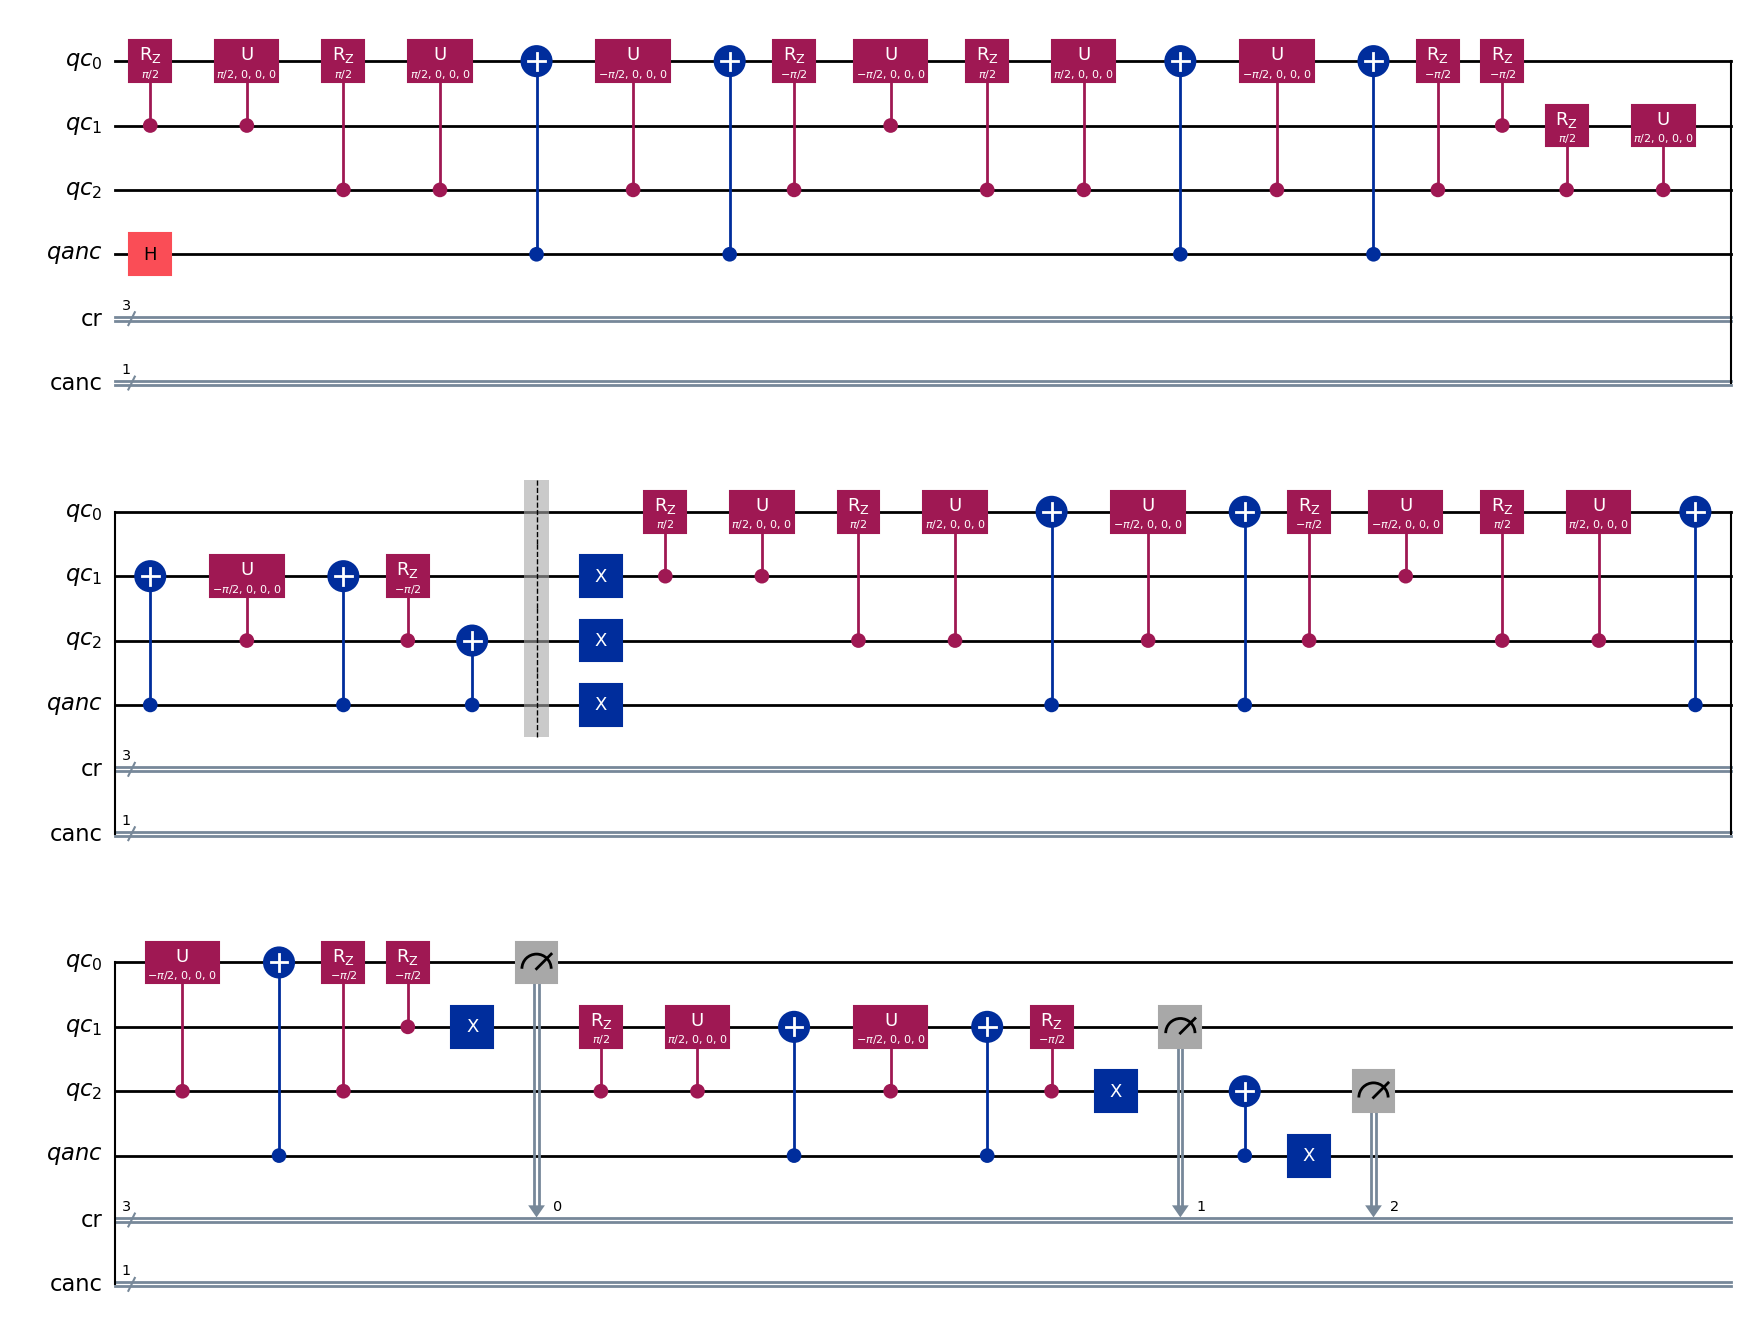

In [5]:
step = 1
qwc = runQWC(qwc, step)
qwc.draw(output="mpl")



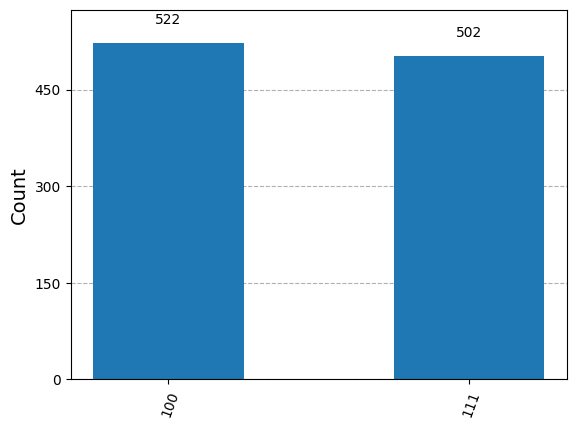

In [6]:
result = ibmsim(qwc)
plot_histogram(result)

In [7]:
import qiskit
qiskit.__version__

'1.4.2'